# UTS SOAL 1

1.	Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM

In [ ]:
!pip install pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'g:\penambangan web\nlp\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd

# Nama file yang akan dibaca
file_path = "Berita.csv"

try:
    # 1. Memuat dataset dari file CSV ke dalam DataFrame pandas
    df = pd.read_csv(file_path)

    print("✅ Data 'Berita.csv' berhasil dimuat.")
    print("--------------------------------------------------\n")

    # Menampilkan 5 baris pertama untuk melihat contoh data
    print("Berikut adalah 5 baris pertama dari data Anda:")
    display(df.head())
    print("\n--------------------------------------------------\n")


    # 2. Menampilkan semua fitur (nama kolom) yang ada
    print("Fitur (kolom) yang terdapat dalam dataset adalah:")
    print(list(df.columns))
    print("\n--------------------------------------------------\n")


    # 3. Mengidentifikasi dan menampilkan kelas kategori yang unik
    #    Ini penting untuk mengetahui label apa saja yang akan diprediksi
    unique_categories = df['kategori'].unique()

    print(f"Ditemukan {len(unique_categories)} kelas kategori yang unik, yaitu:")
    print(list(unique_categories))


except FileNotFoundError:
    print(f"❌ Eror: File '{file_path}' tidak ditemukan.")
    print("Mohon pastikan Anda telah mengunggah file tersebut dan nama filenya sudah benar.")

except KeyError:
    print("❌ Eror: Kolom 'kategori' tidak ditemukan dalam file.")
    print("Mohon periksa kembali apakah nama kolom kategori sudah benar sesuai struktur file Anda.")

✅ Data 'Berita.csv' berhasil dimuat.
--------------------------------------------------

Berikut adalah 5 baris pertama dari data Anda:


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...



--------------------------------------------------

Fitur (kolom) yang terdapat dalam dataset adalah:
['No', 'judul', 'berita', 'tanggal', 'kategori', 'link']

--------------------------------------------------

Ditemukan 4 kelas kategori yang unik, yaitu:
['Ekonomi', 'Olahraga', 'Nasional', 'Internasional']


✅ Data berhasil dimuat.

Berikut adalah jumlah berita untuk setiap kategori:


kategori
Ekonomi          375
Olahraga         375
Nasional         375
Internasional    375
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19564\3075526902.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


✅ Plot distribusi kategori berhasil dibuat dan disimpan sebagai 'distribusi_kategori.png'


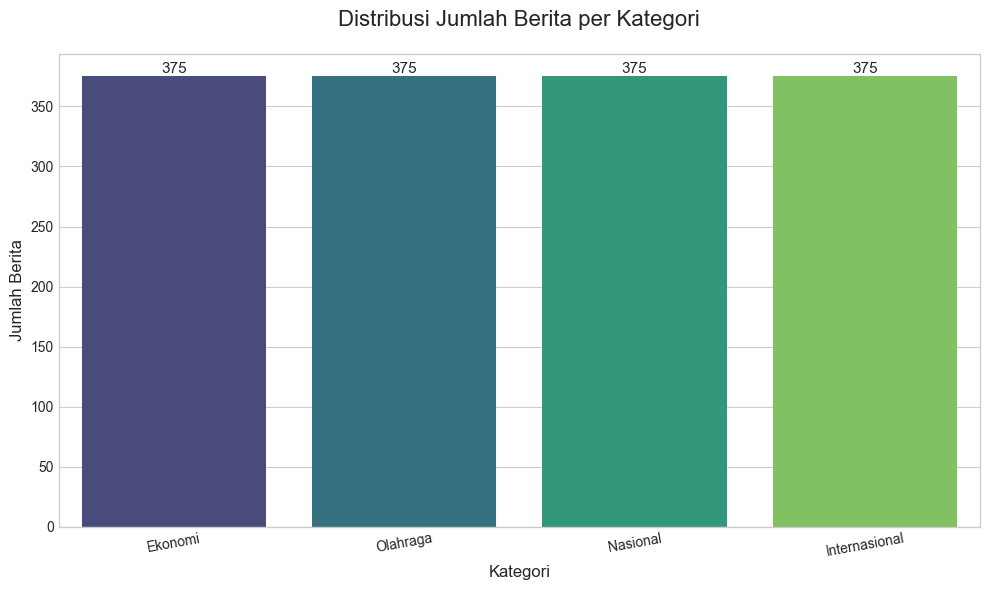

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nama file yang akan dianalisis
file_path = "Berita.csv"

try:
    # Membaca file CSV ke dalam DataFrame
    df = pd.read_csv(file_path)

    print("✅ Data berhasil dimuat.\n")

    # --- LANGKAH 1: Menghitung Jumlah Berita per Kategori ---
    # Menggunakan metode value_counts() untuk menghitung frekuensi setiap kategori
    category_counts = df['kategori'].value_counts()

    print("Berikut adalah jumlah berita untuk setiap kategori:")
    # Menggunakan display() agar output lebih rapi di lingkungan seperti Jupyter
    display(category_counts)
    print("\n" + "="*50 + "\n")


    # --- LANGKAH 2: Membuat Plot untuk Visualisasi ---

    # Mengatur gaya plot agar terlihat menarik
    plt.style.use('seaborn-v0_8-whitegrid')

    # Membuat canvas untuk plot dengan ukuran 10x6 inch
    fig, ax = plt.subplots(figsize=(10, 6))

    # Membuat bar plot menggunakan seaborn
    sns.barplot(
        x=category_counts.index,
        y=category_counts.values,
        palette='viridis',
        ax=ax
    )

    # Menambahkan judul dan label pada sumbu
    ax.set_title('Distribusi Jumlah Berita per Kategori', fontsize=16, pad=20)
    ax.set_xlabel('Kategori', fontsize=12)
    ax.set_ylabel('Jumlah Berita', fontsize=12)

    # Memutar label di sumbu X jika namanya panjang agar tidak tumpang tindih
    plt.xticks(rotation=10)

    # Menambahkan label angka (jumlah) di atas setiap bar
    for i, count in enumerate(category_counts.values):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=11)

    # Mengatur layout agar semua elemen pas dan tidak terpotong
    plt.tight_layout()

    # Menyimpan plot sebagai file gambar PNG
    output_filename = 'distribusi_kategori.png'
    plt.savefig(output_filename)

    print(f"✅ Plot distribusi kategori berhasil dibuat dan disimpan sebagai '{output_filename}'")


except FileNotFoundError:
    print(f"❌ Eror: File '{file_path}' tidak ditemukan.")
    print("Mohon pastikan Anda telah mengunggah file tersebut dan nama filenya sudah benar.")

except KeyError:
    print("❌ Eror: Kolom 'kategori' tidak ditemukan dalam file.")
    print("Mohon periksa kembali apakah nama kolom kategori sudah benar.")

Preprocessing

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- Bagian Fungsi-Fungsi ---

def load_data(filepath):
    """Fungsi untuk memuat data dari file CSV."""
    try:
        df = pd.read_csv(filepath)
        print(f"✅ Data '{filepath}' berhasil dimuat. Total: {len(df)} baris.")
        return df
    except FileNotFoundError:
        print(f"❌ Eror: File '{filepath}' tidak ditemukan.")
        return None

def preprocess_and_tokenize(text, stopword_remover):
    """
    Fungsi untuk membersihkan dan melakukan tokenisasi pada teks.
    1. Case Folding
    2. Noise Removal
    3. Stopword Removal
    4. Tokenization (memecah kalimat menjadi kata)
    (Stemming dinonaktifkan untuk kecepatan)
    """
    # 1. Case Folding: Mengubah teks menjadi huruf kecil
    text = text.lower()

    # 2. Noise Removal: Menghapus angka, tanda baca, dan karakter non-alfabet
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # 3. Stopword Removal
    text = stopword_remover.remove(text)

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # 4. Tokenization: Memecah string menjadi daftar kata (tokens)
    tokens = text.split()

    return tokens

def save_data(df, filepath, columns):
    """Fungsi untuk menyimpan DataFrame ke file CSV."""
    df.to_csv(filepath, columns=columns, index=False)
    print(f"✅ Data berhasil disimpan di: '{filepath}'")

# --- Bagian Eksekusi Utama ---

if __name__ == "__main__":
    # Konfigurasi nama file
    file_path = "Berita.csv"
    output_train_path = "Berita_train_processed.csv"
    output_test_path = "Berita_test_processed.csv"

    # Inisialisasi stopword remover dari Sastrawi
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    # 1. Muat data
    df = load_data(file_path)

    if df is not None:
        # 2. Lakukan preprocessing dan tokenisasi pada kolom 'berita'
        print("\n⚙️  Memulai proses preprocessing dan tokenisasi...")
        # Kolom 'tokens' akan berisi daftar kata (hasil tokenisasi)
        df['tokens'] = df['berita'].apply(lambda x: preprocess_and_tokenize(x, stopword_remover))

        # Kolom 'processed_text' adalah gabungan token untuk disimpan ke CSV
        df['processed_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
        print("✅ Proses selesai.")

        print("\nContoh hasil tokenisasi:")
        display(df[['berita', 'processed_text', 'tokens']].head())

        # 3. Pisahkan data menjadi data latih dan uji (80/20) secara stratified
        X = df.drop('kategori', axis=1)
        y = df['kategori']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print(f"\n✅ Data berhasil di-split menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")

        # 4. Gabungkan kembali fitur dan target untuk disimpan
        df_train = pd.concat([X_train, y_train], axis=1)
        df_test = pd.concat([X_test, y_test], axis=1)

        # 5. Simpan hasil ke file CSV
        # Kita hanya simpan kolom yang relevan untuk tahap selanjutnya
        columns_to_save = ['judul', 'processed_text', 'kategori']
        save_data(df_train, output_train_path, columns_to_save)
        save_data(df_test, output_test_path, columns_to_save)

✅ Data 'Berita.csv' berhasil dimuat. Total: 1500 baris.

⚙️  Memulai proses preprocessing dan tokenisasi...
✅ Proses selesai.

Contoh hasil tokenisasi:


,berita,processed_text,tokens
0,Menteri Koordinator (Menko) Bidang Perekonomia...,menteri koordinator menko bidang perekonomian ...,"[menteri, koordinator, menko, bidang, perekono..."
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...",rangka memeriahkan hari jadi pt surabaya indus...,"[rangka, memeriahkan, hari, jadi, pt, surabaya..."
2,Wacana Presiden Prabowo Subianto akan membentu...,wacana presiden prabowo subianto membentuk mem...,"[wacana, presiden, prabowo, subianto, membentu..."
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,bpjs ketenagakerjaan kementerian agama kemenag...,"[bpjs, ketenagakerjaan, kementerian, agama, ke..."
4,Pemerintah akan segera membentuk Satuan Tugas ...,pemerintah segera membentuk satuan tugas pemut...,"[pemerintah, segera, membentuk, satuan, tugas,..."



✅ Data berhasil di-split menjadi 1200 data latih dan 300 data uji.
✅ Data berhasil disimpan di: 'Berita_train_processed.csv'
✅ Data berhasil disimpan di: 'Berita_test_processed.csv'


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')

# --- Konfigurasi ---
train_file_path = "Berita_train_processed.csv"
model_save_path = "cbow_word2vec.model"

# --- MAIN SCRIPT ---
try:
    # 1. Muat data latih yang sudah diproses
    df_train = pd.read_csv(train_file_path)
    print(f"✅ Data latih '{train_file_path}' berhasil dimuat.")

    # Membersihkan data dari baris kosong jika ada
    df_train.dropna(subset=['processed_text'], inplace=True)

    # 2. Persiapkan kalimat untuk model Word2Vec
    # Model gensim memerlukan input berupa list of lists, di mana setiap list inner adalah kalimat yang sudah di-tokenisasi.
    sentences = [row.split() for row in df_train['processed_text']]
    print(f"✅ Data siap untuk training. Jumlah kalimat: {len(sentences)}")

    # 3. Latih model Word2Vec dengan arsitektur CBOW
    print("\n⚙️  Memulai training model Word2Vec (CBOW)...")

    # Inisialisasi model
    # vector_size: Dimensi dari word vector yang akan dihasilkan. 100-300 adalah nilai umum.
    # window: Jarak maksimum antara kata target dan kata konteks di sekitarnya.
    # min_count: Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini.
    # workers: Jumlah thread CPU yang digunakan untuk melatih model.
    # sg=0: Menentukan arsitektur model. sg=0 untuk CBOW, sg=1 untuk Skip-gram.
    cbow_model = Word2Vec(
        sentences,
        vector_size=100,
        window=5,
        min_count=2,
        workers=4,
        sg=0
    )

    print("✅ Training model CBOW selesai.")

    # 4. Simpan model yang sudah dilatih untuk digunakan nanti
    cbow_model.save(model_save_path)
    print(f"✅ Model berhasil disimpan di: '{model_save_path}'")

    # 5. Uji coba dan eksplorasi model
    print("\n--- Eksplorasi Model ---")

    # Mengecek kosakata yang terekam
    total_words = len(cbow_model.wv.key_to_index)
    print(f"Jumlah kata unik dalam vocabulary model: {total_words}")

    # Mencoba mencari kata yang paling mirip (similar) dengan kata tertentu
    # Ganti 'ekonomi' dengan kata lain yang kemungkinan besar ada di vocabulary Anda
    try:
        test_word = 'ekonomi'
        similar_words = cbow_model.wv.most_similar(test_word, topn=5)
        print(f"\nKata yang paling mirip dengan '{test_word}':")
        for word, score in similar_words:
            print(f"  - {word} (skor: {score:.4f})")
    except KeyError:
        print(f"\nKata 'ekonomi' tidak ditemukan dalam vocabulary model. Coba kata lain yang lebih umum.")

    # Melihat representasi vektor dari sebuah kata
    try:
        vector_example = cbow_model.wv['ekonomi']
        print(f"\nContoh vektor untuk kata 'ekonomi' (dimensi: {len(vector_example)}):")
        print(vector_example[:10]) # Tampilkan 10 dimensi pertama saja
    except KeyError:
        pass


except FileNotFoundError:
    print(f"❌ Eror: File data latih '{train_file_path}' tidak ditemukan.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

✅ Data latih 'Berita_train_processed.csv' berhasil dimuat.
✅ Data siap untuk training. Jumlah kalimat: 1200

⚙️  Memulai training model Word2Vec (CBOW)...
✅ Training model CBOW selesai.
✅ Model berhasil disimpan di: 'cbow_word2vec.model'

--- Eksplorasi Model ---
Jumlah kata unik dalam vocabulary model: 14005

Kata yang paling mirip dengan 'ekonomi':
  - efisiensi (skor: 0.9923)
  - pertumbuhan (skor: 0.9909)
  - kebijakan (skor: 0.9892)
  - bansos (skor: 0.9886)
  - meningkatkan (skor: 0.9886)

Contoh vektor untuk kata 'ekonomi' (dimensi: 100):
[-0.04902241  0.30665454  0.23667234 -0.3457286   0.20329432 -1.1054946
  0.38969043  1.2275196  -0.26195562 -0.4291012 ]


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import warnings

warnings.filterwarnings('ignore')

def create_document_vector(tokens, model_wv):
    """
    Membuat satu vektor untuk seluruh dokumen dengan merata-ratakan
    vektor dari setiap kata dalam dokumen tersebut.
    """
    vector_list = [model_wv[token] for token in tokens if token in model_wv]

    if not vector_list:
        return np.zeros(model_wv.vector_size)

    return np.mean(vector_list, axis=0)

# --- Konfigurasi ---
train_file_path = "Berita_train_processed.csv"
model_save_path = "cbow_word2vec.model"

# --- MAIN SCRIPT ---
try:
    # 1. Muat data latih yang sudah diproses
    df_train = pd.read_csv(train_file_path)
    df_train.dropna(subset=['processed_text'], inplace=True)
    print(f"✅ Data latih '{train_file_path}' berhasil dimuat.")

    # 2. Muat model CBOW yang sudah ada
    cbow_model = Word2Vec.load(model_save_path)
    print(f"✅ Model CBOW '{model_save_path}' berhasil dimuat.")

    # Dapatkan wv (keyed vectors) dari model untuk efisiensi
    model_wv = cbow_model.wv

    # 3. Buat kolom 'tokens' untuk di-iterasi
    # (Diperlukan jika belum ada di file CSV)
    df_train['tokens'] = df_train['processed_text'].apply(lambda x: x.split())

    # 4. Buat Vektor Dokumen untuk Setiap Baris
    print("\n⚙️  Membuat vektor dokumen untuk setiap baris di DataFrame...")

    # Menerapkan fungsi ke kolom 'tokens' untuk membuat kolom baru 'vector'
    df_train['vector'] = df_train['tokens'].apply(lambda tokens: create_document_vector(tokens, model_wv))

    print("✅ Kolom 'vector' berhasil dibuat.")

    # 5. Tampilkan hasilnya dalam DataFrame
    print("\nBerikut adalah tampilan DataFrame dengan kolom vektor dokumen:")
    # Kita tampilkan kolom-kolom yang relevan untuk verifikasi
    display(df_train[['processed_text', 'kategori', 'vector']].head())

    # Memeriksa dimensi dari salah satu vektor untuk konfirmasi
    first_vector_shape = df_train['vector'].iloc[0].shape
    print(f"\nDimensi setiap vektor dalam kolom 'vector' adalah: {first_vector_shape[0]}")


except FileNotFoundError:
    print(f"❌ Eror: Pastikan file '{train_file_path}' dan '{model_save_path}' sudah ada.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

✅ Data latih 'Berita_train_processed.csv' berhasil dimuat.
✅ Model CBOW 'cbow_word2vec.model' berhasil dimuat.

⚙️  Membuat vektor dokumen untuk setiap baris di DataFrame...
✅ Kolom 'vector' berhasil dibuat.

Berikut adalah tampilan DataFrame dengan kolom vektor dokumen:


,processed_text,kategori,vector
0,empat orang tewas insiden kecelakaan helikopte...,Internasional,"[-0.27786732, 0.3804702, 0.047788188, 0.078038..."
1,menteri koordinator bidang hukum hak asasi man...,Nasional,"[-0.076985665, 0.20031618, 0.12889229, -0.0598..."
2,marselino ferdinan mencetak gol tim akademi ox...,Olahraga,"[-0.35705736, 0.78847283, -0.39490005, 0.07691..."
3,sebelas titik api baru ditemukan muncul wilaya...,Internasional,"[-0.43942237, 0.49079612, -0.035154816, 0.1293..."
4,badan penanggulangan bencana daerah bpbd kabup...,Nasional,"[-0.2517571, 0.43415004, 0.12305205, 0.1401242..."



Dimensi setiap vektor dalam kolom 'vector' adalah: 100


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

# --- Fungsi untuk membuat vektor dokumen ---
def create_document_vector(tokens, model_wv):
    vector_list = [model_wv[token] for token in tokens if token in model_wv]
    if not vector_list:
        return np.zeros(model_wv.vector_size)
    return np.mean(vector_list, axis=0)

# --- Memuat model dan data ---
try:
    # Muat model Word2Vec yang sudah dilatih
    cbow_model = Word2Vec.load("cbow_word2vec.model")
    model_wv = cbow_model.wv

    # Muat data latih dan uji yang sudah diproses
    df_train = pd.read_csv("Berita_train_processed.csv").dropna()
    df_test = pd.read_csv("Berita_test_processed.csv").dropna()

    # --- Mempersiapkan Matriks Fitur (X) dan Vektor Target (y) ---

    # Membuat token untuk setiap set data
    train_tokens = [text.split() for text in df_train['processed_text']]
    test_tokens = [text.split() for text in df_test['processed_text']]

    # Membuat vektor dokumen untuk setiap baris data
    X_train_vectors = [create_document_vector(tokens, model_wv) for tokens in train_tokens]
    X_test_vectors = [create_document_vector(tokens, model_wv) for tokens in test_tokens]

    # Mengubah list of vectors menjadi matriks numpy
    X_train = np.array(X_train_vectors)
    X_test = np.array(X_test_vectors)

    # Menyiapkan vektor target (kategori)
    y_train = df_train['kategori']
    y_test = df_test['kategori']

    print("✅ Data latih dan uji berhasil disiapkan untuk klasifikasi.")
    print(f"Dimensi X_train: {X_train.shape}")
    print(f"Dimensi X_test: {X_test.shape}")

except FileNotFoundError:
    print("❌ Eror: Pastikan file CSV (train/test) dan model CBOW sudah ada.")

✅ Data latih dan uji berhasil disiapkan untuk klasifikasi.
Dimensi X_train: (1200, 100)
Dimensi X_test: (300, 100)


## Klasifikasi NB


--- 1. Klasifikasi dengan Gaussian Naive Bayes ---
✅ Model Gaussian Naive Bayes berhasil dilatih.
✅ Prediksi pada data uji selesai.

📈 Akurasi Model: 0.7733 (77.33%)

📊 Laporan Klasifikasi:
               precision    recall  f1-score   support

      Ekonomi       0.75      0.65      0.70        75
Internasional       1.00      0.67      0.80        75
     Nasional       0.54      0.80      0.64        75
     Olahraga       1.00      0.97      0.99        75

     accuracy                           0.77       300
    macro avg       0.82      0.77      0.78       300
 weighted avg       0.82      0.77      0.78       300


🔠 Confusion Matrix:


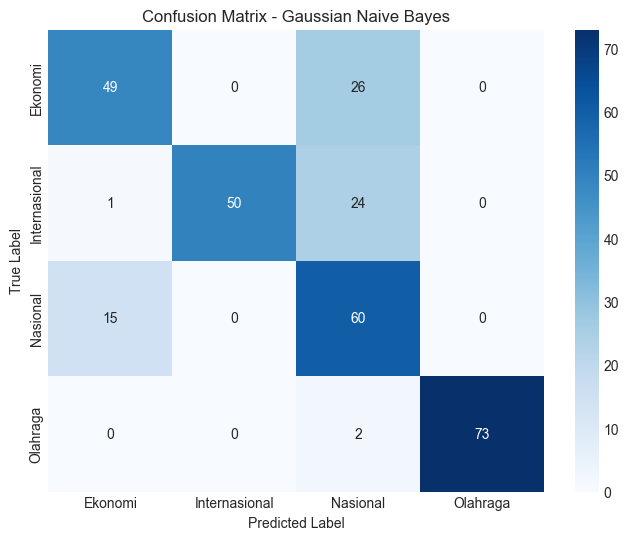

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*40)
print("--- 1. Klasifikasi dengan Gaussian Naive Bayes ---")
print("="*40)

# 1. Inisialisasi dan Latih Model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("✅ Model Gaussian Naive Bayes berhasil dilatih.")

# 2. Lakukan Prediksi pada Data Uji
y_pred_gnb = gnb_model.predict(X_test)
print("✅ Prediksi pada data uji selesai.")

# 3. Evaluasi Kinerja Model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"\n📈 Akurasi Model: {accuracy_gnb:.4f} ({accuracy_gnb*100:.2f}%)")

print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_gnb))

# 4. Tampilkan Confusion Matrix
print("\n🔠 Confusion Matrix:")
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb_model.classes_, yticklabels=gnb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


--- 2. Klasifikasi dengan Support Vector Machine (SVM) ---
✅ Model SVM berhasil dilatih.
✅ Prediksi pada data uji selesai.

📈 Akurasi Model: 0.8867 (88.67%)

📊 Laporan Klasifikasi:
               precision    recall  f1-score   support

      Ekonomi       0.79      0.93      0.85        75
Internasional       0.96      0.89      0.92        75
     Nasional       0.83      0.73      0.78        75
     Olahraga       0.99      0.99      0.99        75

     accuracy                           0.89       300
    macro avg       0.89      0.89      0.89       300
 weighted avg       0.89      0.89      0.89       300


🔠 Confusion Matrix:


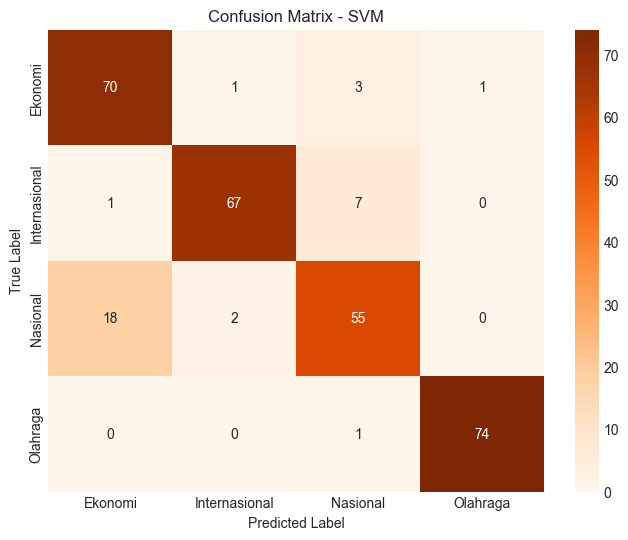

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*40)
print("--- 2. Klasifikasi dengan Support Vector Machine (SVM) ---")
print("="*40)

# 1. Inisialisasi dan Latih Model
# Kernel 'linear' adalah pilihan awal yang baik. 'rbf' juga populer.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
print("✅ Model SVM berhasil dilatih.")

# 2. Lakukan Prediksi pada Data Uji
y_pred_svm = svm_model.predict(X_test)
print("✅ Prediksi pada data uji selesai.")

# 3. Evaluasi Kinerja Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n📈 Akurasi Model: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")

print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm))

# 4. Tampilkan Confusion Matrix
print("\n🔠 Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()

Kesimpulan:

SVM terihat memiliki memiliki performa keseluruhan yang lebih baik daripada Naive Bayes. namun hasil performa masih kurang baik, saya menduga hal ini terjadi karena saya sengaja melewatkan bagian lemmatisasi di preprocessing untuk mempercepat waktu komputasi




## Ekstraksi fitur Dengan LDA

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Muat data latih dan uji yang sudah diproses
df_train = pd.read_csv("Berita_train_processed.csv").dropna()
df_test = pd.read_csv("Berita_test_processed.csv").dropna()

print("✅ Data latih dan uji berhasil dimuat.")

# Inisialisasi CountVectorizer
# max_df=0.95 -> Abaikan kata yang muncul di > 95% dokumen (terlalu umum)
# min_df=2 -> Abaikan kata yang muncul kurang dari 2 kali (terlalu langka)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)

# Buat Document-Term Matrix untuk data latih
X_train_dtm = vectorizer.fit_transform(df_train['processed_text'])

# Gunakan vectorizer yang sama untuk data uji
X_test_dtm = vectorizer.transform(df_test['processed_text'])

# Ambil target (kategori)
y_train = df_train['kategori']
y_test = df_test['kategori']

print(f"✅ Document-Term Matrix berhasil dibuat.")
print(f"Dimensi DTM Latih: {X_train_dtm.shape}")
print(f"Jumlah kosa kata (fitur): {X_train_dtm.shape[1]}")

✅ Data latih dan uji berhasil dimuat.
✅ Document-Term Matrix berhasil dibuat.
Dimensi DTM Latih: (1200, 12348)
Jumlah kosa kata (fitur): 12348


In [ ]:

dtm_df = pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names_out())
display(dtm_df.head())

,00,10,100,11,12,13,14,15,16,18,...,zona,zonasi,zonasinya,zone,zoom,zuhri,zulhas,zulhaszulhas,zulkifli,zwolle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# --- 1. Persiapan Data (Sama seperti sebelumnya) ---
df_train = pd.read_csv("Berita_train_processed.csv").dropna()
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X_train_dtm = vectorizer.fit_transform(df_train['processed_text'])
print("✅ Document-Term Matrix berhasil dibuat.")

# --- 2. Ekstraksi Fitur dengan LDA ---
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

print("\n⚙️  Melatih model LDA pada data latih...")
X_train_lda = lda.fit_transform(X_train_dtm)
print("✅ Model LDA berhasil dilatih.")


# --- 3. PRINT OUT BARU: Inspeksi Model LDA yang Lebih Detail ---

# 3A. Menampilkan Metrik Kualitas Model
# ----------------------------------------------
log_likelihood = lda.score(X_train_dtm)
perplexity = lda.perplexity(X_train_dtm)

print("\n" + "="*50)
print("📊 KUALITAS MODEL LDA SECARA KESELURUHAN")
print("="*50)
print(f"📈 Log-Likelihood: {log_likelihood:.2f} (Semakin tinggi, semakin baik)")
print(f"📉 Perplexity:     {perplexity:.2f} (Semakin rendah, semakin baik)")
print("💡 Metrik ini mengukur seberapa 'pas' model topik dengan data Anda.")


# 3B. Menampilkan Vektor Topik dan Kata Kunci
# ----------------------------------------------
print("\n" + "="*50)
print("📊 INSPEKSI VEKTOR TOPIK & KATA KUNCI")
print("="*50)

feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

# Iterasi setiap topik untuk menampilkan detailnya
for topic_idx, topic_vector in enumerate(lda.components_):
    print(f"\n--- Topik #{topic_idx:02d} ---")

    # Menampilkan sampel Vektor Topik-Kata
    # Vektor ini menunjukkan bobot setiap kata untuk topik ini.
    print(f"   Vektor mentah (15 kata pertama): {topic_vector[:15].round(2)}")
    print(f"   (Dimensi total vektor ini: {len(feature_names)} kata)")

    # Menampilkan kata-kata kunci (sama seperti sebelumnya, tapi lebih terstruktur)
    top_words_indices = topic_vector.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"   => Kata Kunci Paling Dominan: {' '.join(top_words)}")


# 3C. Menampilkan Contoh Fitur Dokumen (Sama seperti sebelumnya)
# -----------------------------------------------------------------
print("\n" + "="*50)
print("📊 CONTOH FITUR UNTUK SATU DOKUMEN")
print("="*50)

doc_index = 0
sample_text = df_train['processed_text'].iloc[doc_index]
topic_distribution = X_train_lda[doc_index]
dominant_topic = topic_distribution.argmax()

print(f"Teks Asli (sudah diproses): '{sample_text}'")
print(f"\nDistribusi Topik (Fitur LDA): {topic_distribution.round(3)}")
print(f"💡 Penjelasan: Dokumen ini paling dominan ({topic_distribution.max():.2%}) masuk ke Topik #{dominant_topic:02d}.")

✅ Document-Term Matrix berhasil dibuat.

⚙️  Melatih model LDA pada data latih...
✅ Model LDA berhasil dilatih.

📊 KUALITAS MODEL LDA SECARA KESELURUHAN
📈 Log-Likelihood: -2145467.80 (Semakin tinggi, semakin baik)
📉 Perplexity:     2532.98 (Semakin rendah, semakin baik)
💡 Metrik ini mengukur seberapa 'pas' model topik dengan data Anda.

📊 INSPEKSI VEKTOR TOPIK & KATA KUNCI

--- Topik #00 ---
   Vektor mentah (15 kata pertama): [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
   (Dimensi total vektor ini: 12348 kata)
   => Kata Kunci Paling Dominan: israel senjata gaza gencatan hamas palestina ppn menteri sandera persen

--- Topik #01 ---
   Vektor mentah (15 kata pertama): [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
   (Dimensi total vektor ini: 12348 kata)
   => Kata Kunci Paling Dominan: indonesia menjadi tahun lebih persen minyak baru kerja akan juta

--- Topik #02 ---
   Vektor mentah (15 kata pertama): [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1


VISUALISASI: Distribusi Topik per Dokumen (Heatmap)


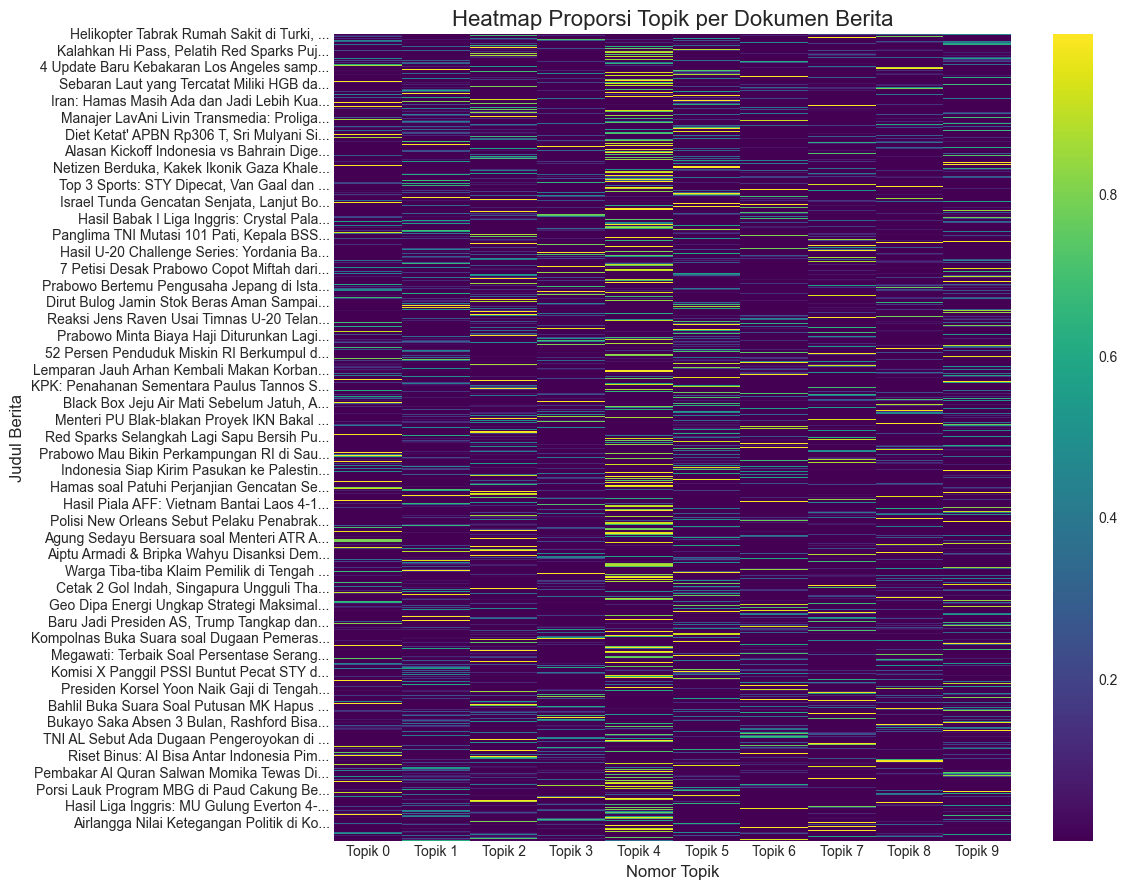

In [ ]:


print("\n" + "="*50)
print("VISUALISASI: Distribusi Topik per Dokumen (Heatmap)")
print("="*50)

# Membuat DataFrame dari hasil distribusi topik LDA
# Kolom: Topik, Baris: Dokumen
topic_dist_df = pd.DataFrame(X_train_lda, columns=[f'Topik {i}' for i in range(n_topics)])

# Menggunakan judul berita sebagai indeks untuk pemahaman yang lebih baik
# Kita potong judul yang panjang agar rapi di plot
doc_titles = df_train['judul'].apply(lambda x: x[:40] + '...' if len(x) > 40 else x)
topic_dist_df.index = doc_titles

# Mengatur ukuran plot
plt.figure(figsize=(12, 9))

# Membuat heatmap dengan Seaborn
sns.heatmap(topic_dist_df, cmap='viridis', annot=False) # annot=False karena terlalu banyak sel

# Menambahkan judul dan label
plt.title('Heatmap Proporsi Topik per Dokumen Berita', fontsize=16)
plt.xlabel('Nomor Topik', fontsize=12)
plt.ylabel('Judul Berita', fontsize=12)
plt.xticks(rotation=0) # Agar label x tidak miring
plt.tight_layout() # Merapikan layout

# Menampilkan plot
plt.show()

Klasifikasi NB dengan fitur LDA

In [ ]:
print(X_train_lda)
print(y_train)
print(X_train_lda.shape)
print(y_train.shape)

[[7.35414537e-04 7.35380151e-04 7.35436979e-04 ... 2.01224138e-01
  3.18233034e-01 4.75394921e-01]
 [8.38723380e-02 3.48567671e-04 7.01727998e-01 ... 3.48482568e-04
  3.48507471e-04 3.48516416e-04]
 [3.90679109e-04 1.07322205e-01 3.90686623e-04 ... 2.60647843e-02
  3.90740009e-04 3.90689766e-04]
 ...
 [1.32072361e-01 6.06461747e-01 2.21793107e-04 ... 2.21794305e-04
  2.21799241e-04 4.66762773e-02]
 [1.96152382e-04 5.74373191e-02 1.96113147e-04 ... 1.96105359e-04
  1.96125466e-04 1.96140563e-04]
 [5.26358049e-04 6.11647219e-01 1.78523713e-02 ... 5.26375982e-04
  5.26369787e-04 5.26388326e-04]]
0       Internasional
1            Nasional
2            Olahraga
3       Internasional
4            Nasional
            ...      
1195         Olahraga
1196         Nasional
1197         Nasional
1198    Internasional
1199         Olahraga
Name: kategori, Length: 1200, dtype: object
(1200, 10)
(1200,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

print("\n" + "="*40)
print("--- Klasifikasi dengan Naive Bayes (Fitur LDA) ---")
print("="*40)

# Inisialisasi dan Latih Model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_lda, y_train)

# Lakukan Prediksi
y_pred_mnb = mnb_model.predict(X_test_lda)

# Evaluasi Kinerja
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"\n📈 Akurasi Model: {accuracy_mnb:.4f} ({accuracy_mnb*100:.2f}%)")

print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_mnb))


--- Klasifikasi dengan Naive Bayes (Fitur LDA) ---

📈 Akurasi Model: 0.9133 (91.33%)

📊 Laporan Klasifikasi:
               precision    recall  f1-score   support

      Ekonomi       0.80      0.93      0.86        75
Internasional       0.97      0.97      0.97        75
     Nasional       0.92      0.75      0.82        75
     Olahraga       0.99      1.00      0.99        75

     accuracy                           0.91       300
    macro avg       0.92      0.91      0.91       300
 weighted avg       0.92      0.91      0.91       300



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

print("\n" + "="*40)
print("--- Klasifikasi dengan SVM (Fitur LDA) ---")
print("="*40)

# Inisialisasi dan Latih Model
svm_model_lda = SVC(kernel='linear', random_state=42)
svm_model_lda.fit(X_train_lda, y_train)

# Lakukan Prediksi
y_pred_svm = svm_model_lda.predict(X_test_lda)

# Evaluasi Kinerja
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n📈 Akurasi Model: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")

print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm))


--- Klasifikasi dengan SVM (Fitur LDA) ---

📈 Akurasi Model: 0.9100 (91.00%)

📊 Laporan Klasifikasi:
               precision    recall  f1-score   support

      Ekonomi       0.79      0.92      0.85        75
Internasional       0.96      0.97      0.97        75
     Nasional       0.92      0.75      0.82        75
     Olahraga       0.99      1.00      0.99        75

     accuracy                           0.91       300
    macro avg       0.91      0.91      0.91       300
 weighted avg       0.91      0.91      0.91       300

